# Profitability Simulation for Warranty Policy

## Author(s)


Author = {"name": "Aashna Ahuja", "affiliation": "UBC Sauder School of Business"}


## Purpose
 
This notebook explores the possibilities and frequency of profitability for a camera with a given warranty policy. Per this policy, if the camera fails within 2 years, the customer receives a new camera, with the warranty continuing for the remaining duration of the initial 2 years. 

 
## Data Processing

A given dataset of samples with the products' lifetimes was used to find the appropriate distribution to run samples from. This step was done in Arena. 

The appropriate distribution was found to be Weibull with shape 1.07 and scale 1.94.

 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
import scipy.stats as stats  

In [3]:
#testing code to pull a random lifetime value

from scipy.stats import weibull_min

n = 1     # number of samples
k = 1.07     # shape
lam = 1.94   # scale

x = weibull_min.rvs(k, loc=0, scale=lam)



In [4]:
og_warranty=2 #original warranty term
rev= 250 #revenue per product
cost=150 #cost per product
profit=rev-cost
profit_list=[]

for i in range (5000):                         #runs 5000 iterations 
    life=weibull_min.rvs(k, loc=0, scale=lam)  #randomly generates a lifetime from given distribution
    if life>=og_warranty:
        profit_list.append(profit)
    else:
        new_cam_no=1
        new_warranty=og_warranty-life
        new_life=weibull_min.rvs(k, loc=0, scale=lam)
        while(new_life<new_warranty):         #calculates how many replacements would be required for given iteration
            new_cam_no+=1
            new_warranty=new_warranty-new_life
            new_life=weibull_min.rvs(k, loc=0, scale=lam)
        p=profit-(new_cam_no*cost)
        profit_list.append(p)

(array([   7.,    0.,   74.,    0.,  288.,    0.,  921.,    0., 1868.,
        1842.]),
 array([-650., -575., -500., -425., -350., -275., -200., -125.,  -50.,
          25.,  100.]),
 <BarContainer object of 10 artists>)

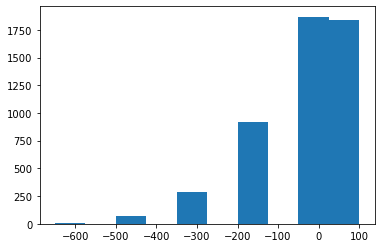

In [5]:
#Generates a histogram of profits simulated
plt.hist(profit_list)

In [6]:
#Average profit 
avg_p= sum(profit_list)/len(profit_list)
print(avg_p)

-47.15
